## MOwNiT
### Julia Smerdel, ZadanieDomowe 6

In [95]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics

#### Zad 1 . Sześć pierwszych wielomianów Hermita.

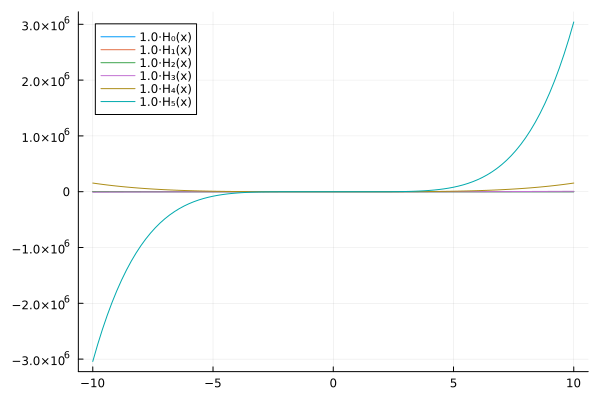

In [96]:
her0 = basis(Hermite, 0)
plot(her0, -10, 10)
her1 = basis(Hermite, 1)
plot!(her1, -10, 10)
her2 = basis(Hermite, 2)
plot!(her2, -10, 10)
her3 = basis(Hermite, 3)
plot!(her3, -10, 10)
her4 = basis(Hermite, 4)
plot!(her4, -10, 10)
her5 = basis(Hermite, 5)
plot!(her5, -10, 10)


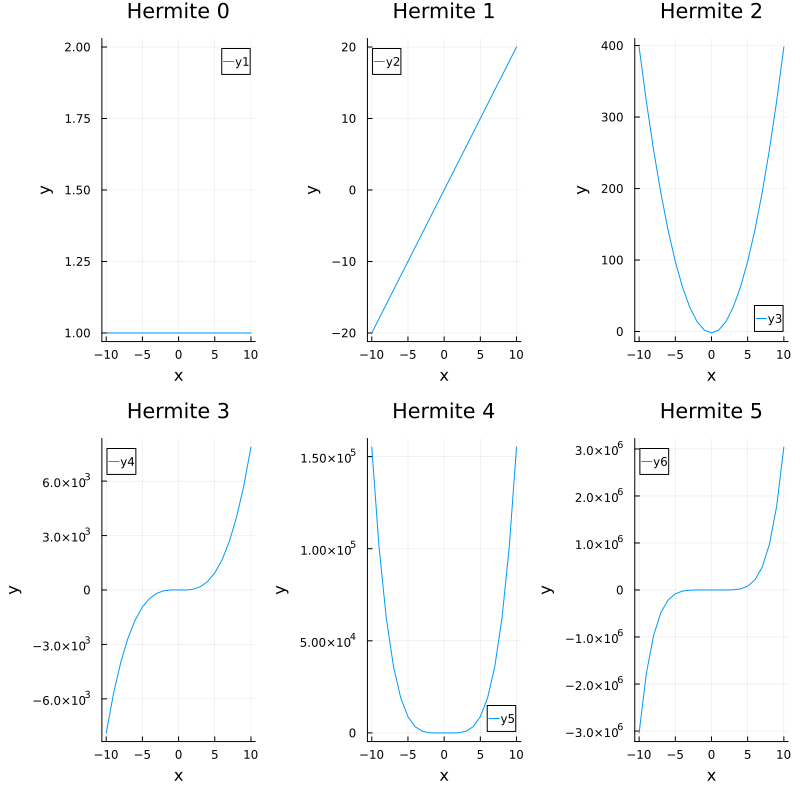

In [97]:
xVals = -10:10
y0 = [her0(x) for x in xVals]
y1 = [her1(x) for x in xVals]
y2 = [her2(x) for x in xVals]
y3 = [her3(x) for x in xVals]
y4 = [her4(x) for x in xVals]
y5 = [her5(x) for x in xVals]

plot(xVals, [y0, y1, y2, y3, y4, y5], layout=(2, 3),
title=[:"Hermite 0" :"Hermite 1" :"Hermite 2" :"Hermite 3" :"Hermite 4" :"Hermite 5"], 
size=(800, 800), xlabel="x", ylabel="y")

#### Zad 2. Sześć pierwszych funkcji bazowych.

In [98]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

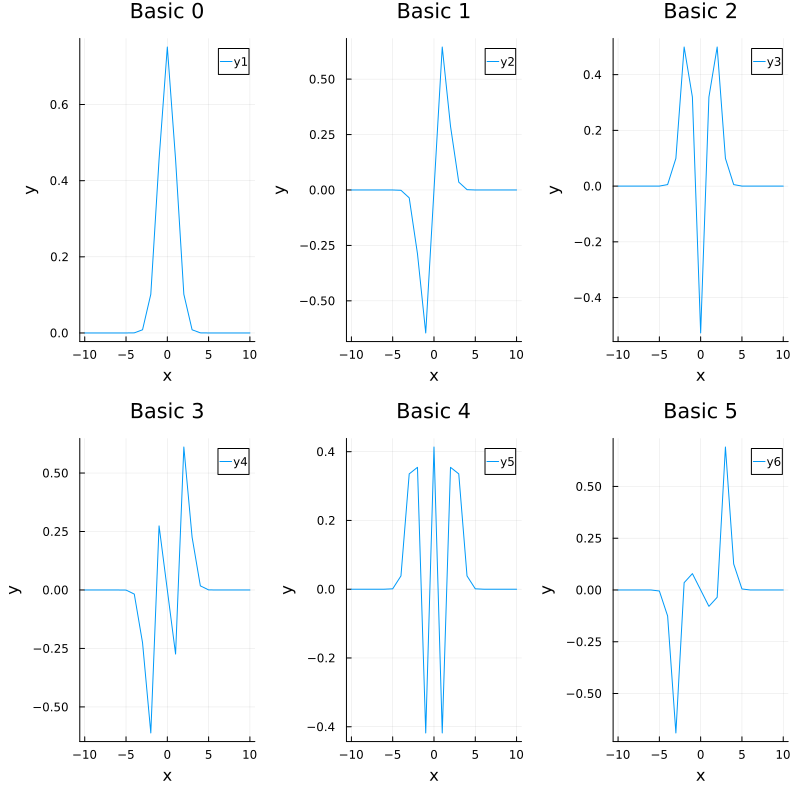

In [99]:
xVals = -10:10
f0 = base_fun(0, xVals)
f1 = base_fun(1, xVals)
f2 = base_fun(2, xVals)
f3 = base_fun(3, xVals)
f4 = base_fun(4, xVals)
f5 = base_fun(5, xVals)

plot(xVals, [f0, f1, f2, f3, f4, f5], layout=(2, 3),
title=["Basic 0" "Basic 1" "Basic 2" "Basic 3" "Basic 4" "Basic 5"], 
size=(800, 800), xlabel="x", ylabel="y")

#### Zad 3. Pokazanie, że same wielomiany nie są ortogonalne, ale z funkcją wagową $e^{-x^2}$ są.

In [100]:
without_fun = Array{Float64, 2}(undef, 6, 6);
with_fun = Array{Float64, 2}(undef, 6, 6);

#without wage function
for (i, f_i) in enumerate([y0, y1, y2, y3, y4, y5]) 
    for (j, f_j) in enumerate([y0, y1, y2, y3, y4, y5])
        without_fun[i,j] = dot(f_i, f_j)
    end
end

#with wage function
for (i, f_i) in enumerate([f0, f1, f2, f3, f4, f5]) 
    for (j, f_j) in enumerate([f0, f1, f2, f3, f4, f5])
        with_fun[i,j] = dot(f_i, f_j)
    end
end

without_fun

6×6 Matrix{Float64}:
     21.0       0.0          3038.0        …  773948.0         0.0
      0.0    3080.0             0.0                0.0         2.37208e8
   3038.0       0.0        798420.0                2.41997e8   0.0
      0.0  792176.0             0.0                0.0         7.94391e10
 773948.0       0.0             2.41997e8          7.99361e10  0.0
      0.0       2.37208e8       0.0        …       0.0         2.72392e13

Wartości iloczynu skalarnego są często różne od 0, zatem wielomiany nie są ortogonalne.

In [101]:
with_fun

6×6 Matrix{Float64}:
  1.0           7.79246e-18  -0.00143227   …   0.00739767    8.96181e-19
  7.79246e-18   1.0          -7.91226e-18      1.35256e-17  -0.0729399
 -0.00143227   -7.91226e-18   1.0             -0.0640744    -4.58779e-18
  3.1895e-18    0.0145479     3.44431e-18     -7.49213e-18   0.316395
  0.00739767    1.35256e-17  -0.0640744        1.0          -2.66317e-17
  8.96181e-19  -0.0729399    -4.58779e-18  …  -2.66317e-17   1.0

Można zauważyć, że wartości na przekątnej są równe 1.0. a macierz jest symetryczna, zatem z wykorzystaniem funkcji wagowej są one ortogonalne (a nawet ortonormalne).

#### Zad 4. Aproksymacja zespołu QRS typu N oraz V.

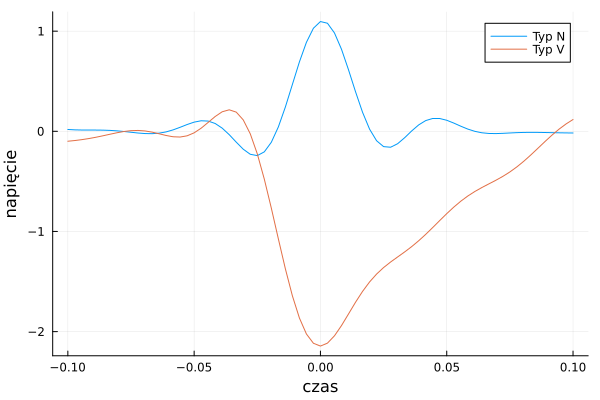

In [102]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [103]:
#scaling to be on the same page with instruction given during labs
xx_ekg = ekg_data.time*40 
yy_ekgV = ekg_data.signalV;
yy_ekgN = ekg_data.signalN;

In [104]:
function approximationDegree(xx_ekg, yy_ekg, maxi)
    result = Array{Float64, 1}(undef, length(xx_ekg))
    for i in 0:maxi
        basis = base_fun(i, xx_ekg)
        c = dot(yy_ekg, basis)
        y_app = c * basis
        result += y_app
    end
    result
end

approximationDegree (generic function with 1 method)

In [107]:
VRes = Array{Float64, 2}(undef, 6, 73)
for i in 0:5
    VRes[i+1, :] = approximationDegree(xx_ekg, yy_ekgV, i)
end

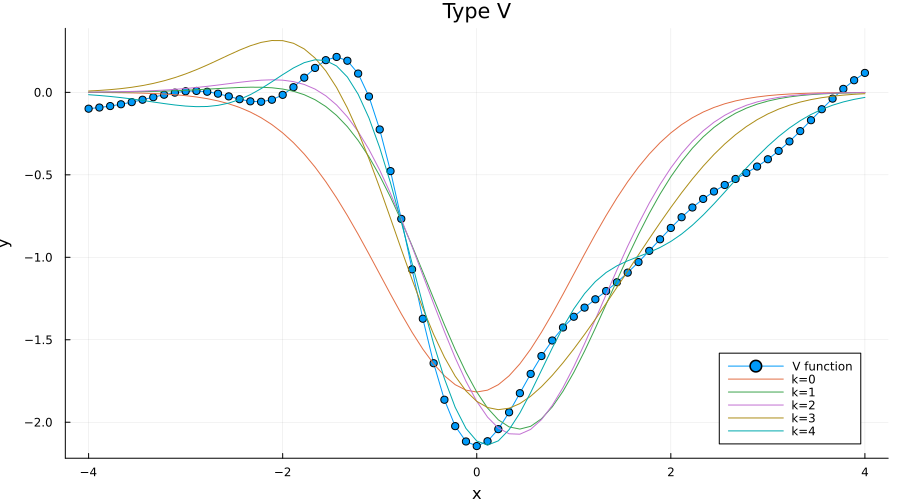

In [108]:
plot(xx_ekg, yy_ekgV, markershape=:circle, label="V function", size = (900,500), xlabel="x", ylabel="y", title="Type V")
plot!(xx_ekg, VRes[1,:], label="k=0")
plot!(xx_ekg, VRes[2,:], label="k=1")
plot!(xx_ekg, VRes[3,:], label="k=2")
plot!(xx_ekg, VRes[4,:], label="k=3")
plot!(xx_ekg, VRes[5,:], label="k=4")

In [109]:
NRes = Array{Float64, 2}(undef, 6, 73)
for i in 0:5
    NRes[i+1, :] = approximationDegree(xx_ekg, yy_ekgN, i)
end

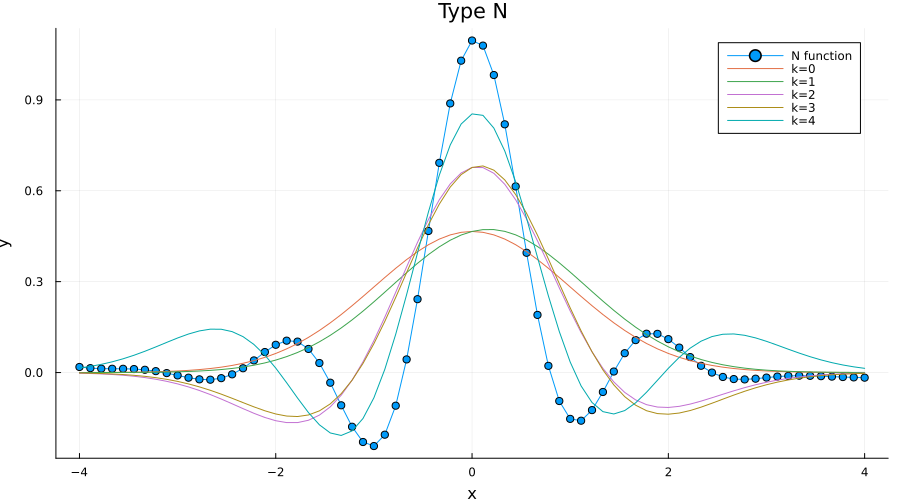

In [110]:
plot(xx_ekg, yy_ekgN, markershape=:circle, label="N function", size = (900,500), xlabel="x", ylabel="y", title="Type N")
plot!(xx_ekg, NRes[1,:], label="k=0")
plot!(xx_ekg, NRes[2,:], label="k=1")
plot!(xx_ekg, NRes[3,:], label="k=2")
plot!(xx_ekg, NRes[4,:], label="k=3")
plot!(xx_ekg, NRes[5,:], label="k=4")

#### Zad 5. Wykres błędu aproksymacji w zależności od stopni. 

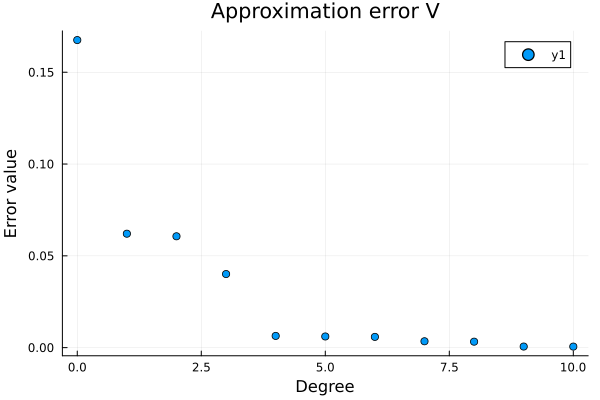

In [122]:
mse(y1, y2) = mean((y1-y2).^2)

VRes2 = Array{Float64, 2}(undef, 11, 73)
for i in 0:10
    VRes2[i+1, :] = approximationDegree(xx_ekg, yy_ekgV, i)
end

VError = Array{Float64, 2}(undef, 11, 2); 
for i in 0:10
    VError[i+1, 1] = i
    VError[i+1, 2] = mse(VRes2[i+1,:], yy_ekgV)
end


scatter(VError[:,1], VError[:,2], title="Approximation error V", xlabel="Degree", ylabel="Error value")

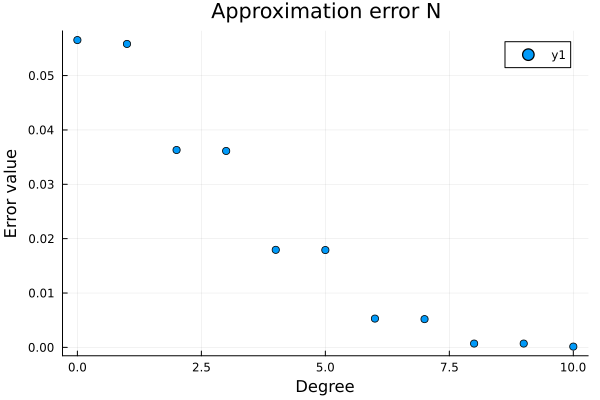

In [121]:
NRes2 = Array{Float64, 2}(undef, 11, 73)
for i in 0:10
    NRes2[i+1, :] = approximationDegree(xx_ekg, yy_ekgN, i)
end

NError = Array{Float64, 2}(undef, 11, 2); 
for i in 0:10
    NError[i+1, 1] = i
    NError[i+1, 2] = mse(NRes2[i+1,:], yy_ekgN)
end


scatter(NError[:,1], NError[:,2], title="Approximation error N", xlabel="Degree", ylabel="Error value")

Najlepiej aproksymować wielomianem 10 stopnia.